***Warranty claims fraud detection***


The aim of this project is to analyze the warranty claims based on region,state,product category, claim value and other features to predict whether the product has warranty period or not. The dataset is available in kaggle.


> Link to the dataset:https://www.kaggle.com/datasets/amanneo/df-cleancsv/data



**IMPORT THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [ ]:
df=pd.read_csv("df_Clean.csv")
df.head(10)

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0
5,5,North West,Kerala,Urban,Kochi,Personal,Entertainment,TV,0,0,...,2,1,0,12000.0,14,3,Internet,1.4,Complaint,0
6,6,South East,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,1,15000.0,12,4,Manufacturer,1.6,Complaint,0
7,7,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,...,1,1,1,10000.0,13,5,Dealer,2.6,Claim,0
8,8,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,...,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,0
9,9,West,Karnataka,Rural,Bangalore,Business,Entertainment,TV,0,0,...,1,1,1,20000.0,12,7,Manufacturer,6.5,Claim,0


**DATA PREPROCESSING**

In [ ]:
# checking the shape of the dataset
df.shape

(358, 21)

In [ ]:
## checking for null values
df.isnull().sum()

Unnamed: 0          0
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [ ]:
## drop the serial number column

df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
## checking the data types

df.dtypes

Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [ ]:
## Unique values checking in the dataset
df.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [ ]:
## checking for duplicte values

df.duplicated().sum()

0

In [ ]:
## checking the last values

df.tail()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
353,East,Tamil Nadu,Rural,Chennai,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,13,3,Manufacturer,0.5,Complaint,0
354,North East,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,1,0.0,15,12,Manufacturer,1.6,Complaint,0
355,South,Tamil Nadu,Urban,Chennai,Personal,Entertainment,TV,0,0,0,2,0,0,0.0,15,254,Dealer,9.0,Claim,0
356,East,Uttar Pradesh,Urban,Lucknow,Personal,Household,AC,1,1,1,0,0,0,50000.0,13,12,Manufacturer,1.5,Claim,1
357,South,Andhra Pradesh,Urban,Vijayawada,Personal,Household,AC,2,2,2,0,0,0,0.0,15,303,Internet,7.0,Complaint,0


In [ ]:
## rename the numerical values in all thee issue columns so that it makes sense

mapping={0: 'No issue', 1: 'Repair', 2: 'Replacement'}
df['AC_1001_Issue']=df['AC_1001_Issue'].map(mapping)
df['AC_1002_Issue']=df['AC_1002_Issue'].map(mapping)
df['AC_1003_Issue']=df['AC_1003_Issue'].map(mapping)
df['TV_2001_Issue']=df['TV_2001_Issue'].map(mapping)
df['TV_2002_Issue']=df['TV_2002_Issue'].map(mapping)
df['TV_2003_Issue']=df['TV_2003_Issue'].map(mapping)


In [ ]:
## check the dataset again

df.head(5)

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No issue,No issue,No issue,Repair,Replacement,No issue,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,Repair,Repair,No issue,No issue,No issue,No issue,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No issue,Repair,Replacement,No issue,No issue,No issue,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No issue,No issue,No issue,Repair,Repair,No issue,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No issue,No issue,No issue,No issue,Repair,Replacement,25000.0,15,6,Dealer,1.3,Claim,0


In [ ]:
df.tail(5)

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
353,East,Tamil Nadu,Rural,Chennai,Personal,Entertainment,TV,No issue,No issue,No issue,No issue,No issue,No issue,0.0,13,3,Manufacturer,0.5,Complaint,0
354,North East,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,No issue,No issue,No issue,Repair,Repair,Repair,0.0,15,12,Manufacturer,1.6,Complaint,0
355,South,Tamil Nadu,Urban,Chennai,Personal,Entertainment,TV,No issue,No issue,No issue,Replacement,No issue,No issue,0.0,15,254,Dealer,9.0,Claim,0
356,East,Uttar Pradesh,Urban,Lucknow,Personal,Household,AC,Repair,Repair,Repair,No issue,No issue,No issue,50000.0,13,12,Manufacturer,1.5,Claim,1
357,South,Andhra Pradesh,Urban,Vijayawada,Personal,Household,AC,Replacement,Replacement,Replacement,No issue,No issue,No issue,0.0,15,303,Internet,7.0,Complaint,0


**DESCRIPTIVE ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            358 non-null    object 
 1   State             358 non-null    object 
 2   Area              358 non-null    object 
 3   City              358 non-null    object 
 4   Consumer_profile  358 non-null    object 
 5   Product_category  358 non-null    object 
 6   Product_type      358 non-null    object 
 7   AC_1001_Issue     358 non-null    object 
 8   AC_1002_Issue     358 non-null    object 
 9   AC_1003_Issue     358 non-null    object 
 10  TV_2001_Issue     358 non-null    object 
 11  TV_2002_Issue     358 non-null    object 
 12  TV_2003_Issue     358 non-null    object 
 13  Claim_Value       358 non-null    float64
 14  Service_Centre    358 non-null    int64  
 15  Product_Age       358 non-null    int64  
 16  Purchased_from    358 non-null    object 
 1

In [ ]:
df.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [ ]:
df.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


In [ ]:
## check numerical data types
numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
print("Numerical columns:")
for i in numerical_columns:
  unique_values=df[i].unique()
  print(f"{i}:{unique_values}")


Numerical columns:
Claim_Value:[15000.  20000.  18000.  12000.  25000.  10000.  50000.  21000.  13000.
 40000.   5557.    373.   2742.   5901.   4585.   8386.   6610.   3905.
  7760.   7028.   5284.   1571.   4000.   4805.   3501.   7755.   6956.
  6542.    170.   6993.   4948.   3549.   7725.   4862.   1656.   2856.
  4097.   5191.   7778.   5316.   4905.    970.   4474.   4891.   4024.
  3316.   4216.    821.   4504.   7153.   3401.   5770.   3539.   3949.
  6586.   6022.   5764.   2250.   5652.   5918.   3541.   6449.   4388.
  5716.5  3129.   5418.   7369.   5584.   1029.   7000.   2961.   5987.
  4163.   7528.   7370.   8344.   2538.   5465.   3149.   4431.   3998.
  3589.   1388.   1003.   1691.   4674.   3651.   3580.   6405.   5618.
  6732.   6767.    501.   5821.   7235.   4088.   4396.   5283.   5033.
  4832.   5513.   2515.   2000.   5000.   9000.      0.   6000. ]
Service_Centre:[10 12 14 16 15 13 11]
Product_Age:[ 60  10  20   6   3   4   5  18   7  21  16   9  19  14  12 

In [ ]:
## checking object data types

object_columns=df.select_dtypes(include=["object"]).columns

print("\n Object columns:")
for column in object_columns:
  unique_values=df[column].unique()
  print(f"{column}:{unique_values}")


 Object columns:
Region:['South' 'North' 'North East' 'North West' 'South East' 'South West'
 'West' 'East']
State:['Karnataka' 'Haryana' 'Tamil Nadu' 'Jharkhand' 'Kerala' 'Andhra Pradesh'
 'Bihar' 'Gujarat' 'Delhi' 'Maharashtra' 'West Bengal' 'Goa'
 'Jammu and Kashmir' 'Assam' 'Rajasthan' 'Madhya Pradesh' 'Uttar Pradesh'
 'Tripura' 'Himachal Pradesh' 'Orissa']
Area:['Urban' 'Rural']
City:['Bangalore' 'Chandigarh' 'Chennai' 'Ranchi' 'Kochi' 'Hyderabad' 'Patna'
 'Purnea' 'Vadodara' 'New Delhi' 'Mumbai' 'Ahmedabad' 'Pune' 'Kolkata'
 'Vizag' 'Panaji' 'Srinagar' 'Guwhati' 'Jaipur' 'Bhopal' 'Meerut' 'Delhi'
 'Agartala' 'Shimla' 'Bhubaneswar' 'Vijayawada' 'Lucknow']
Consumer_profile:['Business' 'Personal']
Product_category:['Entertainment' 'Household']
Product_type:['TV' 'AC']
AC_1001_Issue:['No issue' 'Repair' 'Replacement']
AC_1002_Issue:['No issue' 'Repair' 'Replacement']
AC_1003_Issue:['No issue' 'Replacement' 'Repair']
TV_2001_Issue:['Repair' 'No issue' 'Replacement']
TV_2002_Issue:['R

In [ ]:
df.head(5)

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No issue,No issue,No issue,Repair,Replacement,No issue,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,Repair,Repair,No issue,No issue,No issue,No issue,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No issue,Repair,Replacement,No issue,No issue,No issue,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No issue,No issue,No issue,Repair,Repair,No issue,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No issue,No issue,No issue,No issue,Repair,Replacement,25000.0,15,6,Dealer,1.3,Claim,0


**EXPLORATORY DATA ANALYSIS**

***Consumer profile and fraud claims***


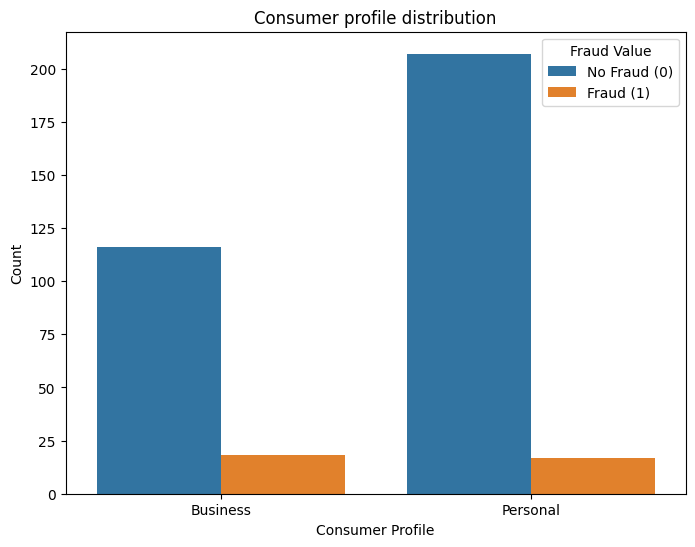

In [ ]:
# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Consumer_profile', hue='Fraud', data=df)
# Set labels and title
plt.xlabel('Consumer Profile')
plt.ylabel('Count')
plt.title('Consumer profile distribution')

# Show the legend
plt.legend(title='Fraud Value', labels=['No Fraud (0)', 'Fraud (1)'])

# Show the plot
plt.show()

***PRODUCT TYPE AND FRAUD CLAIMS***

Text(0.5, 1.0, 'Product and Fraud Distribution')

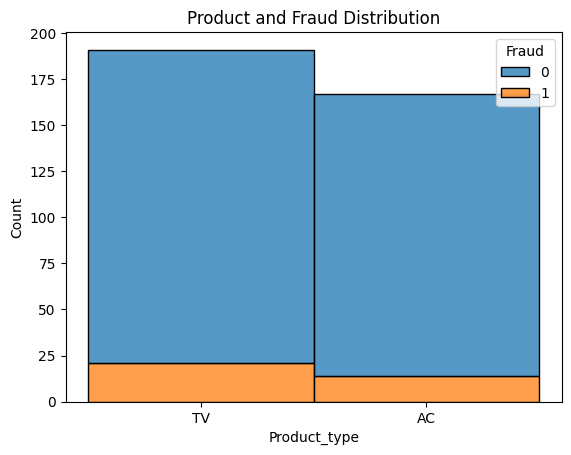

In [ ]:
sns.histplot(x = 'Product_type', data = df, hue = 'Fraud',multiple='stack').set_title('Product and Fraud Distribution')

In [ ]:
counts=df["Product_category"].value_counts()

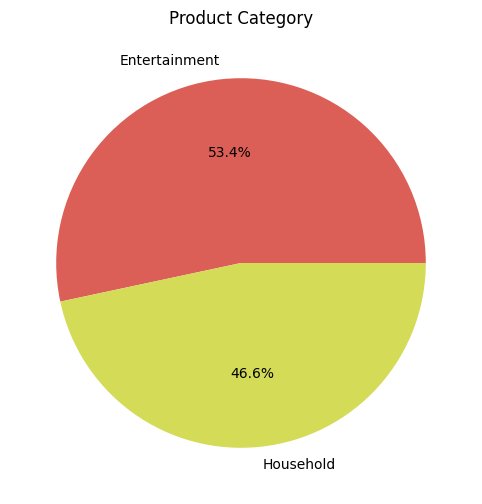

In [ ]:
plt.figure(figsize=(9,6))
counts=df["Product_category"].value_counts()
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title("Product Category")
plt.show()

**Location based distribution and fraudulent claims**

[Text(0.5, 1.0, 'Areawise distribution of Fraudulent Claims')]

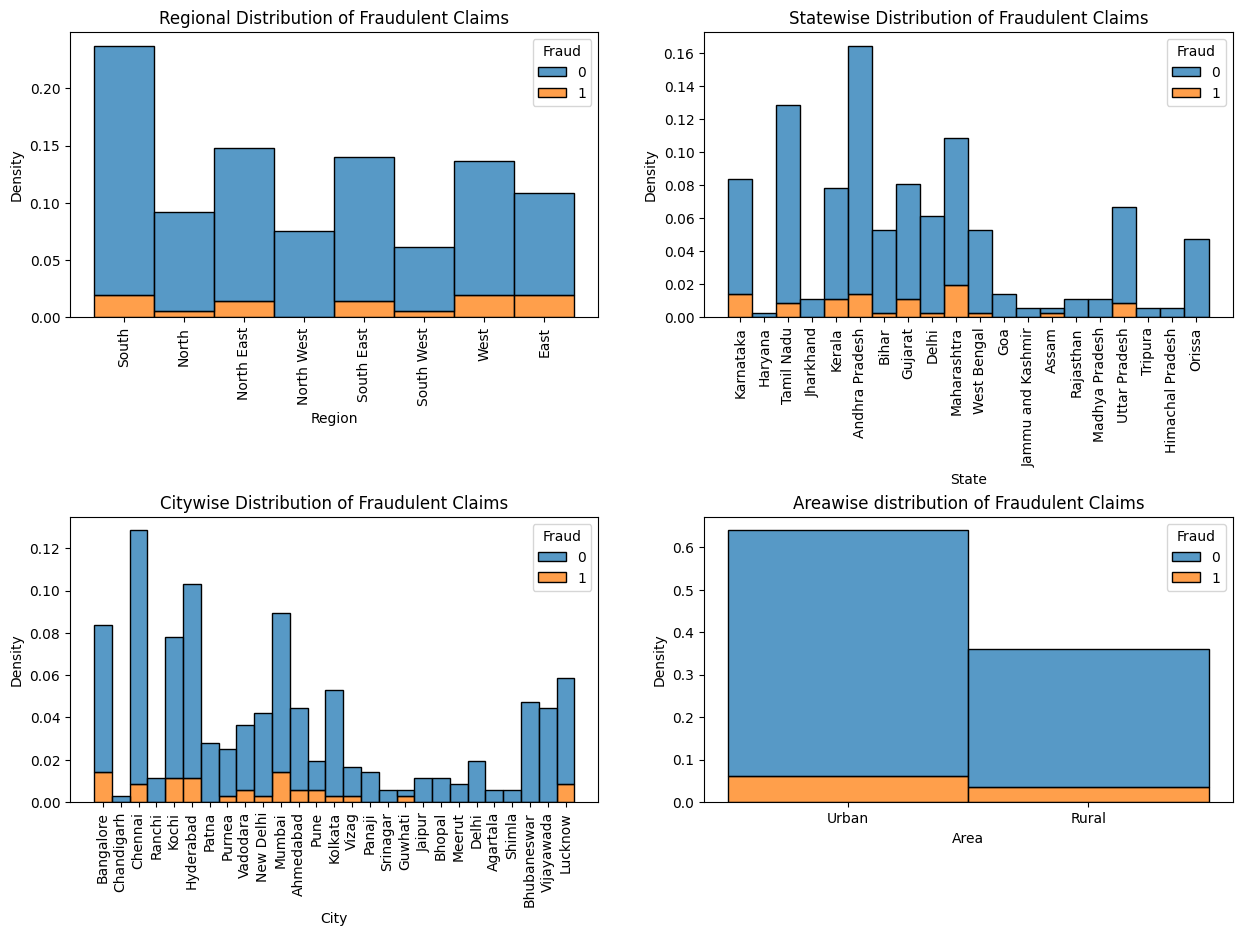

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = 'Region', data = df, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'State', data = df, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'City', data = df, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'Area', data = df, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise distribution of Fraudulent Claims')

**Issue with products and fraudulent claims**




[Text(0.5, 1.0, 'AC_1003_Issue and Fraud Distribution')]

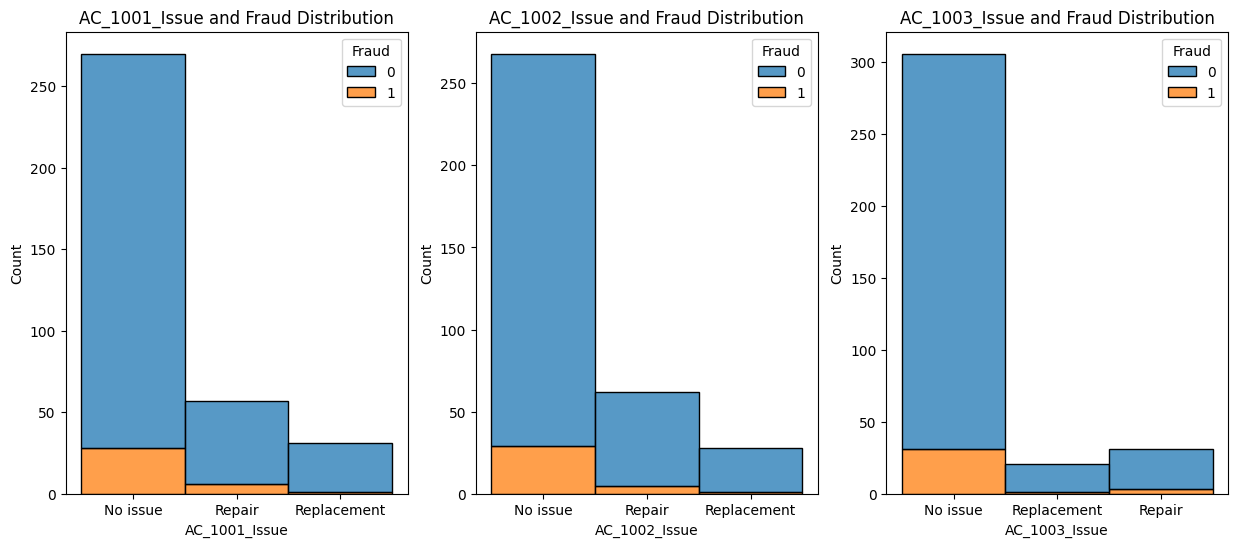

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.histplot(x = 'AC_1001_Issue', data = df, ax =ax[0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1002_Issue', data = df, ax =ax[1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1003_Issue', data = df, ax =ax[2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')

[Text(0.5, 1.0, 'TV_2003_Issue and Fraud Distribution')]

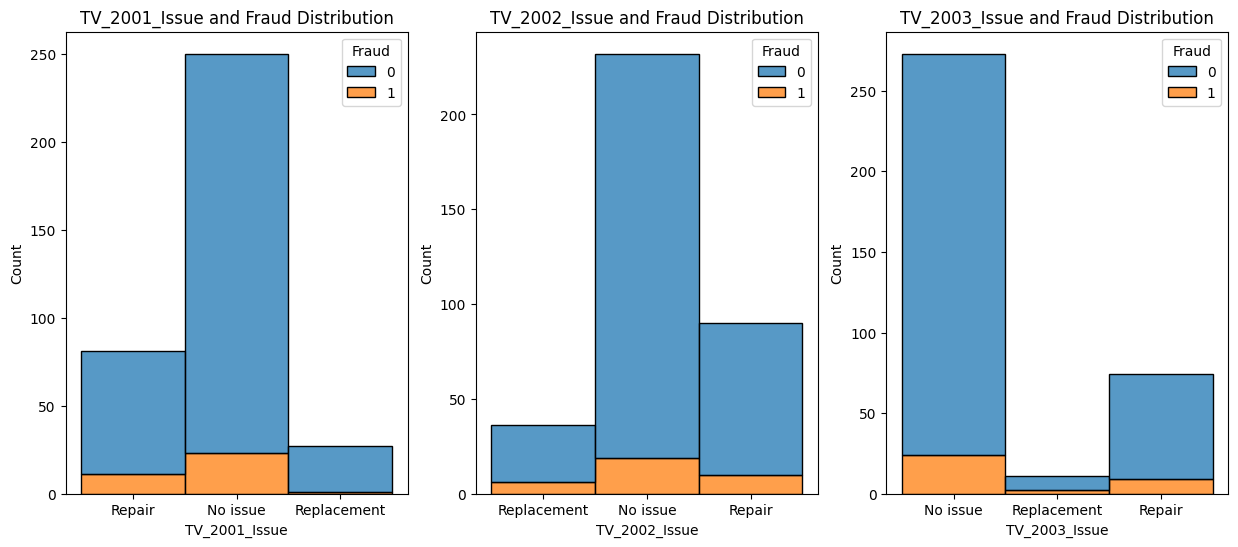

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.histplot(x = 'TV_2001_Issue', data = df, ax =ax[0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2002_Issue', data = df, ax =ax[1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2003_Issue', data = df, ax =ax[2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

**Relation between product type and purchsed from**

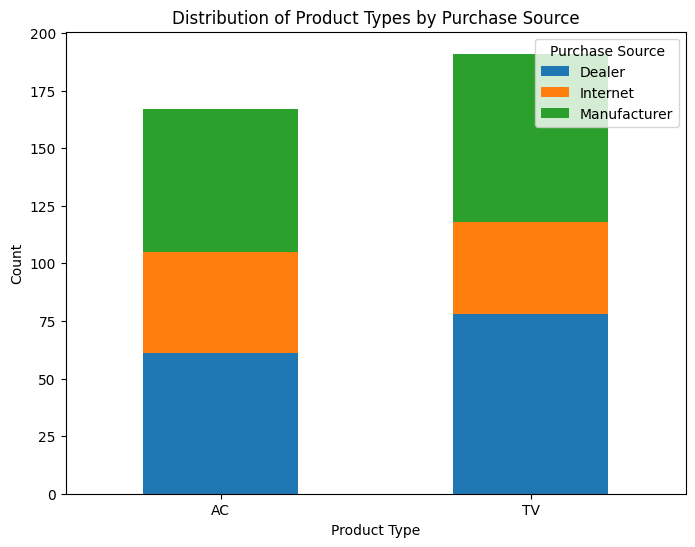

In [ ]:
# Group the data by 'Product_Type' and 'Purchased_From' and calculate the counts
grouped_data = df.groupby(['Product_type', 'Purchased_from']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Distribution of Product Types by Purchase Source')

# Show the plot
plt.legend(title='Purchase Source', loc='upper right')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
grouped_data

Purchased_from,Dealer,Internet,Manufacturer
Product_type,,,
AC,61,44,62
TV,78,40,73


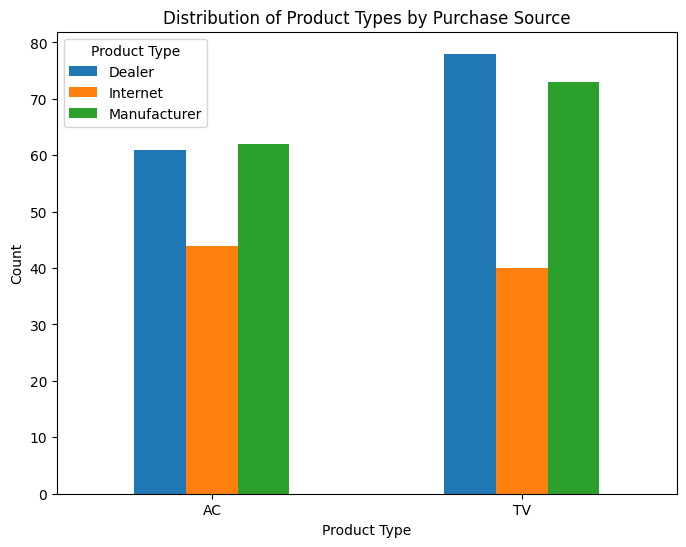

In [ ]:
pivot_data = df.pivot_table(index='Product_type', columns='Purchased_from', aggfunc='size', fill_value=0)

# Create a grouped bar chart
ax = pivot_data.plot(kind='bar', figsize=(8, 6))

# Set labels and title
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Distribution of Product Types by Purchase Source')

# Set the legend for 'AC' and 'TV'
plt.legend(title='Product Type')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


**SERVICE CENTER AND FRAUDULENT CLAIMS**

Text(0.5, 1.0, 'Service Centre and Fraudulent Claims')

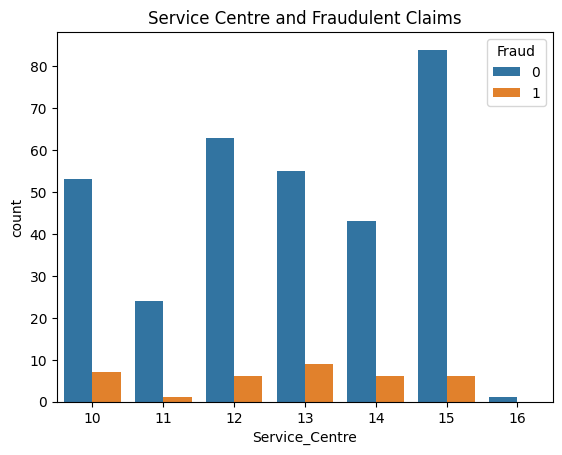

In [ ]:
sns.countplot(x = 'Service_Centre', data = df, hue = 'Fraud').set_title('Service Centre and Fraudulent Claims')

**Product age and fraudulent claims**

Text(0.5, 1.0, 'Product Age(in days) and Fraud Distribution')

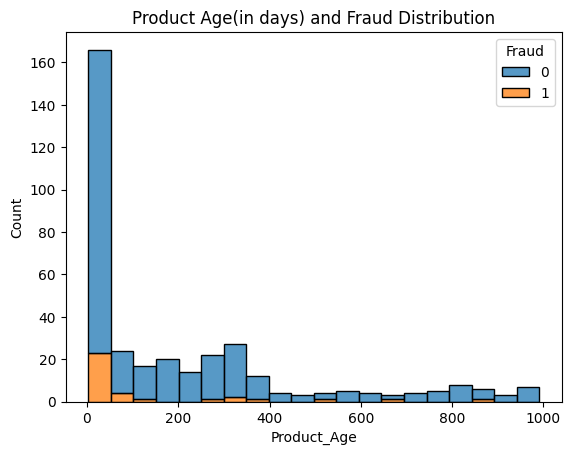

In [ ]:
sns.histplot(x = 'Product_Age', data = df, hue = 'Fraud', multiple='stack', bins = 20).set_title('Product Age(in days) and Fraud Distribution')

**Call Duration and Fraudulent Claims**

Text(0.5, 0, 'Call Duration(in mins)')

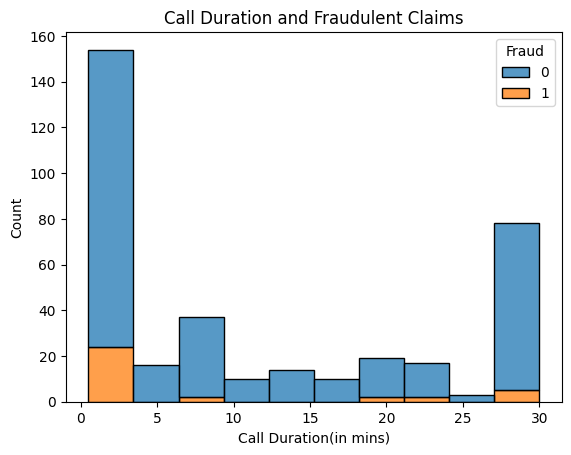

In [ ]:
sns.histplot(x = 'Call_details', data = df, hue = 'Fraud', multiple='stack').set_title('Call Duration and Fraudulent Claims')
plt.xlabel('Call Duration(in mins)')

**Purpose of contact and fraudulent claims**

Text(0.5, 1.0, 'Purpose and Fraudulent Claims')

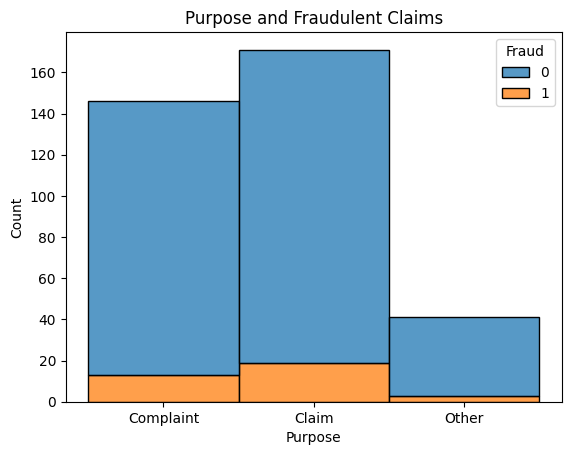

In [ ]:
sns.histplot(x = 'Purpose', data = df, hue = 'Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')

**OUTLIER REMOVAL**

In [ ]:
from scipy import stats
z_scores = stats.zscore(df["Claim_Value"])
z_score_threshold = 3 * z_scores.std()
# Define a threshold for considering data points as outliers (e.g., z_score_threshold = 3)
outlier_mask = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)

# Remove the outliers from the DataFrame
df= df[~outlier_mask]

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Object
le = LabelEncoder()

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:

    df[col] = le.fit_transform(df[col])
    print(col, df[col].unique())


Region [4 1 2 3 5 6 7 0]
State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
AC_1001_Issue [0 1 2]
AC_1002_Issue [0 1 2]
AC_1003_Issue [0 2 1]
TV_2001_Issue [1 0 2]
TV_2002_Issue [2 0 1]
TV_2003_Issue [0 2 1]
Purchased_from [2 0 1]
Purpose [1 0 2]


**CORRELATION HEATMAP**

<Axes: >

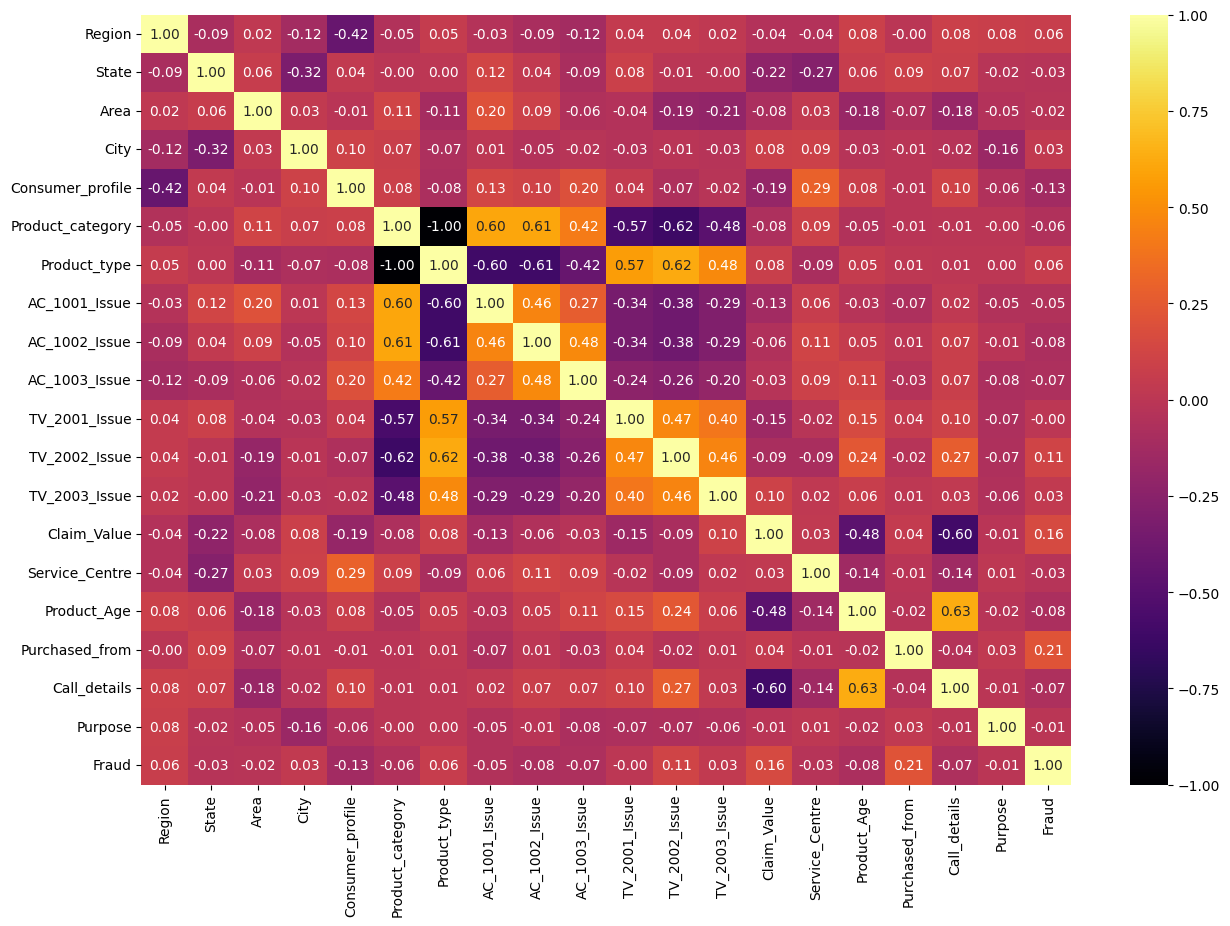

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='inferno', fmt='.2f')

**Splitting the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud',axis=1), df['Fraud'], test_size=0.30, random_state=42)

**Model building**

**1) Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid = GridSearchCV(dtree, param_grid, cv=6, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Decision Tree Classifier
print(grid.best_params_)

Fitting 6 folds for each of 500 candidates, totalling 3000 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
## fitting the best parameters for decision tree classifier
dtree=DecisionTreeClassifier(criterion='gini', max_depth= 2, min_samples_leaf= 2, min_samples_split= 2, random_state= 0)

#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#prediction on test data
d_pred = dtree.predict(X_test)


0.9191489361702128


**2) Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
clf = RandomForestClassifier(n_estimators=50)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#parameters for random search
param_grid = {
    'max_depth': np.arange(2,9),
    'min_samples_leaf': np.arange(2,9),
    'min_samples_split': np.arange(2,9),
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Random search Object with Random Forest Classifier
random = RandomizedSearchCV(clf, param_grid, cv=5, verbose=1, n_jobs=-1,n_iter=10, scoring='accuracy')

#Fitting the grid search object to the training data
random.fit(X_train,y_train)

#Best parameters for Random Forest Classifier
print(random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 3, 'criterion': 'entropy'}


In [ ]:
#random forest classifier with best parameters
clf= RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3, min_samples_split=5, random_state=42)

#Fitting the Random Forest Classifier to the training data
clf.fit(X_train,y_train)

#training accuracy
print(clf.score(X_train,y_train))

#prediction on test data
r_pred = clf.predict(X_test)

0.9191489361702128


**3) K nearest neighboros**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## k nearest neoghbors object
knn = KNeighborsClassifier(algorithm='auto')

In [ ]:
from sklearn.model_selection import GridSearchCV

## parameters for grid search
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

## grid search object
grid = GridSearchCV(knn, parameters_KNN, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for K nearest neighbors
print(grid.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [ ]:
## fitting the best parameters for k neighbors classifier
knn=KNeighborsClassifier(leaf_size= 20, metric= 'minkowski', n_neighbors= 10, p= 1, weights= 'uniform')

#Fitting the Decision Tree Classifier to the training data
knn.fit(X_train,y_train)

#training accuracy
print(knn.score(X_train,y_train))

#prediction on test data
knn_pred = knn.predict(X_test)


0.9191489361702128


**4) Support vector machines(SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm.fit(X_train, y_train)

print(svm.score(X_train,y_train))

# Make predictions on the test data
svm_pred = svm.predict(X_test)


0.9106382978723404


**5) ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the AdaBoost classifier with a base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=2, min_samples_split=6)  # You can customize the base estimator
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=0, learning_rate=0.3)

# Fit the model on the training data
adaboost.fit(X_train, y_train)

print(adaboost.score(X_train,y_train))

# Make predictions on the test data
ad_pred = adaboost.predict(X_test)

0.9744680851063829


**6) XG-BOOST**

In [ ]:
import xgboost as xgb

xgboost = xgb.XGBClassifier(n_estimators=50, max_depth=8, learning_rate=0.1, random_state=42)

# Fit the model on the training data
xgboost.fit(X_train, y_train)

print(xgboost.score(X_train,y_train))

# Make predictions on the test data
xg_pred = xgboost.predict(X_test)


0.9574468085106383


**7) Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

#Fitting the Logistic Regression to the training data
lr.fit(X_train,y_train)

#training accuracy
print(lr.score(X_train,y_train))

#prediction on test data
l_pred = lr.predict(X_test)

0.9191489361702128


**MODEL EVALUATION**

**CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

#classification report for Decision Tree Classifier
print("Classification report for Decision tree classifier:")
print(classification_report(y_test,d_pred))

#classification report for Random Forest Classifier
print("Classification report for Random forest classifier:")
print(classification_report(y_test,r_pred))

#classification report for K nearest neighbors
print("Classification report for K nearest neighbors:")
print(classification_report(y_test,knn_pred))

#classification report for Support vector machines(SVM)
print("Classification report for support vector machines:")
print(classification_report(y_test,svm_pred))

#classification report for Ada boost
print("Classification report for Ada boost:")
print(classification_report(y_test,ad_pred))

#classification report for XG boost
print("Classification report for XG boost:")
print(classification_report(y_test,xg_pred))

#classification report for Logistic regression
print("Classification report for Logistic regression:")
print(classification_report(y_test,l_pred))

Classification report for Decision tree classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        92
           1       0.00      0.00      0.00         9

    accuracy                           0.91       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.83      0.91      0.87       101

Classification report for Random forest classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        92
           1       0.00      0.00      0.00         9

    accuracy                           0.91       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.83      0.91      0.87       101

Classification report for K nearest neighbors:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        92
           1       0.00      0.00      0.00         9

    accuracy                   

**CONFUSION MATRIX**

Text(0.5, 1.0, 'Xg boost')

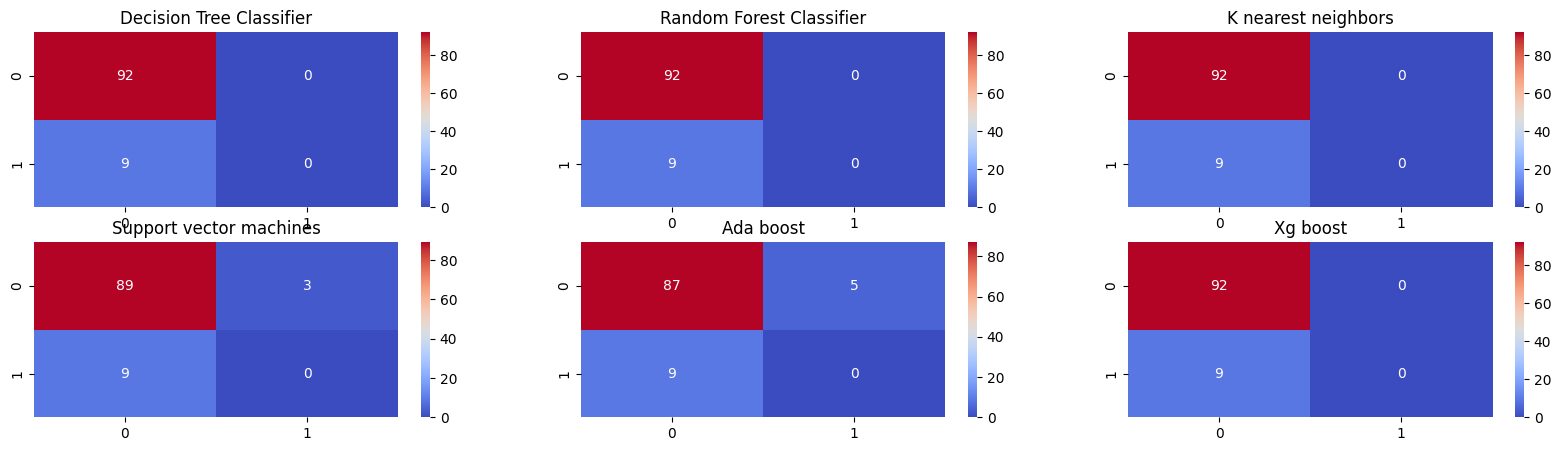

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,5))

from sklearn.metrics import confusion_matrix

#confusion matrix for Decision Tree Classifier
sns.heatmap(confusion_matrix(y_test,d_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Decision Tree Classifier')

#confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,r_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Random Forest Classifier')

#confusion matrix for K nearest neighbors
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True, cmap='coolwarm', ax=ax[0,2]).set_title('K nearest neighbors')

#confusion matrix for Support vector machines
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Support vector machines')

#confusion matrix for Ada boost
sns.heatmap(confusion_matrix(y_test,ad_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('Ada boost')

#confusion matrix for Xg boost
sns.heatmap(confusion_matrix(y_test,xg_pred), annot=True, cmap='coolwarm', ax=ax[1,2]).set_title('Xg boost')




**OTHER METRICS**

In [ ]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,d_pred))
print('R2 Score: ', r2_score(y_test,d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,d_pred))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,r_pred))
print('R2 Score: ', r2_score(y_test,r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,r_pred))

print('==================== K Nearest Neighbors =========================')
print('Accuracy Score: ', accuracy_score(y_test,knn_pred))
print('R2 Score: ', r2_score(y_test,knn_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,knn_pred))

print('==================== Support vector machines ====================')
print('Accuracy Score: ', accuracy_score(y_test,svm_pred))
print('R2 Score: ', r2_score(y_test,svm_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,svm_pred))

print('==================== Ada boost ====================')
print('Accuracy Score: ', accuracy_score(y_test,ad_pred))
print('R2 Score: ', r2_score(y_test,ad_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,ad_pred))

print('==================== XG boost =========================')
print('Accuracy Score: ', accuracy_score(y_test,xg_pred))
print('R2 Score: ', r2_score(y_test,xg_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,xg_pred))

print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test,l_pred))
print('R2 Score: ', r2_score(y_test,l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,l_pred))

==================== Decision Tree Classifier ====================
Accuracy Score:  0.9108910891089109
R2 Score:  -0.09782608695652173
Mean Squared Error:  0.0891089108910891
==================== Random Forest Classifier ====================
Accuracy Score:  0.9108910891089109
R2 Score:  -0.09782608695652173
Mean Squared Error:  0.0891089108910891
==================== K Nearest Neighbors =========================
Accuracy Score:  0.9108910891089109
R2 Score:  -0.09782608695652173
Mean Squared Error:  0.0891089108910891
==================== Support vector machines ====================
Accuracy Score:  0.8811881188118812
R2 Score:  -0.46376811594202905
Mean Squared Error:  0.1188118811881188
==================== Ada boost ====================
Accuracy Score:  0.8613861386138614
R2 Score:  -0.7077294685990339
Mean Squared Error:  0.13861386138613863
==================== XG boost =========================
Accuracy Score:  0.9108910891089109
R2 Score:  -0.09782608695652173
Mean Squared Erro

In [8]:
!apt-get install -qq git

In [23]:
!git init
!git config --global user.name "imlrn-37"
!git config --global user.email "2377naren@gmail.com"

Reinitialized existing Git repository in /content/.git/


In [25]:
!git add Warranty-claims-fraud-detection.ipynb  # Replace 'your_no.ipynb' with the actual filename
!git commit -m "Initial commit"

fatal: pathspec 'Warranty-claims-fraud-detection.ipynb' did not match any files
On branch main
nothing to commit, working tree clean


In [26]:
!ls


sample_data
